## Data, Libraries, set-up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ["MOSEKLM_LICENSE_FILE"] = "/content/drive/MyDrive/Diana Vieira Fernandes - Work folder/Qual A/mosek.lic"

In [ ]:
os.chdir("/content/drive/MyDrive/Diana Vieira Fernandes - Work folder/Qual A/Data")

In [ ]:
!ls "/content/drive/MyDrive/Diana Vieira Fernandes - Work folder/Qual A/Data"

'=10'
 100006-0.parquet
 8500node.zip
'8500node.zip (Unzipped Files)'
 9500-Node-Model-Submission-Model-Files.zip
'9500-Node-Model-Submission-Model-Files.zip (Unzipped Files)'
 annual_solar_value_by_plant_and_county_0.xlsx
 cluster_medians_com.csv
 cluster_medians.csv
 cluster_medians_solar.csv
 edges_list.csv
 European_LV_Test_Feeder_v2.zip
'European_LV_Test_Feeder_v2.zip (Unzipped Files)'
 feeder34.zip
'feeder34.zip (Unzipped Files)'
 GSA_Report_Pittsburgh.xlsx
 gwa-plot-data_2023-09-03169376876345007_19_23_UTC.zip
 IEEE34Node.zip
 median_loads_per_hour.csv
 metadata.tsv
 model.ilp
 monte_carlo_power_output_simulation.csv
 monte_carlo_simulation.csv
 network_44_WB.png
 network_80_WB.png
 network_graph.pgf
 networks_hour
'pa-pv-2006 .zip'
'pa-pv-2006 .zip (Unzipped Files)'
 pos_edges_list.csv
 slack_power_adjustments_p2p_trades.csv
 temp-plot.html
 up00-pjm-mediumoffice.csv
 up00-pjm-single-family_attached.csv
 up01-pa-mobile_home.csv
 your_problem.lp


In [ ]:
!apt-get install -y graphviz libgraphviz-dev #data viz
!pip install pygraphviz diagrams # diagrams
!pip install pandapower["all"] #data
! pip install gurobipy #gurobi (MILP)
! pip install scipy #transform .m to .pp
!pip install pydot graphviz # for HG
! pip install plotly #cute plots
! pip install -U kaleido #to save png IO

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:

In [53]:
import gurobipy as gp
# Create an environment with your WLS license
params = {
"WLSACCESSID":'***',
"WLSSECRET":'****',
"LICENSEID":2433683,
}

env = gp.Env(params=params)

# Create the model within the Gurobi environment
m = gp.Model(env=env)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2433683
Academic license 2433683 - for non-commercial use only - registered to di___@andrew.cmu.edu


## Reading from already calculated clusters

In [ ]:
import pandas as pd
cluster_medians_solar = pd.read_csv('/content/drive/MyDrive/Diana Vieira Fernandes - Work folder/Qual A/Data/cluster_medians_solar.csv', header=0, sep=',')
cluster_medians = pd.read_csv('/content/drive/MyDrive/Diana Vieira Fernandes - Work folder/Qual A/Data/cluster_medians.csv', header=0, sep=',')
cluster_medians_com = pd.read_csv('/content/drive/MyDrive/Diana Vieira Fernandes - Work folder/Qual A/Data/cluster_medians_com.csv', header=0, sep=',')

In [ ]:
import plotly.graph_objects as go

cluster_medians_solar["Hour"] = list(range(24))

fig = go.Figure()

# Add traces for each cluster
fig.add_trace(go.Scatter(x=cluster_medians_solar["Hour"], y=cluster_medians_solar["Cluster_0"], mode='lines', name='Cluster_0'))
fig.add_trace(go.Scatter(x=cluster_medians_solar["Hour"], y=cluster_medians_solar["Cluster_1"], mode='lines', name='Cluster_1'))
fig.add_trace(go.Scatter(x=cluster_medians_solar["Hour"], y=cluster_medians_solar["Cluster_2"], mode='lines', name='Cluster_2'))

# Update axes titles
fig.update_xaxes(title_text="Hour of the Day")
fig.update_yaxes(title_text="kWh")

# Update legend and layout
fig.update_layout(
    title="Daily Clusters - Solar Generation",
    font=dict(family="Times New Roman"),
    title_x=0.5,
    legend=dict(orientation="h", x=1, y=1.1, xanchor="right")
)

fig.show()

In [ ]:
import plotly.graph_objects as go

cluster_medians["Hour"] = list(range(24))

fig = go.Figure()

# Add traces for each cluster
fig.add_trace(go.Scatter(x=cluster_medians["Hour"], y=cluster_medians["Cluster_0"], mode='lines', name='Cluster_0'))
fig.add_trace(go.Scatter(x=cluster_medians["Hour"], y=cluster_medians["Cluster_1"], mode='lines', name='Cluster_1'))
fig.add_trace(go.Scatter(x=cluster_medians["Hour"], y=cluster_medians["Cluster_2"], mode='lines', name='Cluster_2'))

# Update axes titles
fig.update_xaxes(title_text="Hour of the Day")
fig.update_yaxes(title_text="kWh")

# Update legend and layout
fig.update_layout(
    title="Daily Clusters - Loads Residencial",
    font=dict(family="Times New Roman"),
    title_x=0.5,
    legend=dict(orientation="h", x=1, y=1.1, xanchor="right")
)


fig.show()


In [ ]:
cluster_medians_com["Hour"] = list(range(24))
#fig = px.line(cluster_medians_com, x="Hour", y=["Cluster_0", "Cluster_1"], title="Daily Clusters - Loads Commercial")
#fig.update_xaxes(title_text="Hour of the Day ")
#fig.update_yaxes(title_text="Cluster Values(kWh)")
#fig.update_layout(legend=dict(orientation="h", x=0.5, y=1.1))
#fig.show()

## Network

In [ ]:
import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting.plotly import vlevel_plotly
import plotly.io as pio


net = pn.create_cigre_network_lv()

#net = pp.networks.create_synthetic_voltage_control_lv_network(network_class='village_1')
#net.name = "cigre network lv"
fig = vlevel_plotly(net)
#fig.update_layout(width=800, height=600, plot_bgcolor='white',
#                  font=dict(family='Computer Modern, serif', size=12, color='black'))

fig.update_layout(width=800, height=600, plot_bgcolor='white', showlegend=False)

# Show the plot
fig.show()

# Number of buses
n_buses = len(net.bus)

/usr/local/lib/python3.10/dist-packages/pandapower/networks/cigre_networks.py:516: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [ ]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
import networkx as nx
import numpy as np
from scipy.sparse import csr_matrix

# Create a graph from the network
graph = pp.topology.create_nxgraph(net)

# Remove all loads and generations
net.load.drop(net.load.index, inplace=True)
net.sgen.drop(net.sgen.index, inplace=True)
net.gen.drop(net.gen.index, inplace=True)

# Transpose the DataFrame
transposed_df = cluster_medians.T
# Take just the first row (hour 11 for now)
first_row = transposed_df.iloc[:, 11]
#Removing previous values
net.load.drop(net.load.index, inplace=True)

# Find extreme buses (logic is that loads and sgen will be here....)
extreme_buses = [node for node, degree in graph.degree() if degree == 1]
extreme_buses


# set loads on these
for bus in extreme_buses:
    #load = first_row.get(bus, 0)
    load = first_row.iloc[1]
    q_value = np.abs(load * np.tan(np.arccos(0.99)))
    pp.create_load(net, bus=bus, p_mw=load/1e1,q_mvar=q_value/1e1) #recall that values are in MW

# Calculate 50% of the extreme buses
num_to_add = int(len(extreme_buses) * 0.5)

# Randomly select 50% of the extreme buses
np.random.shuffle(extreme_buses)
selected_buses = extreme_buses[:num_to_add]

#Removing previous values
net.sgen.drop(net.sgen.index, inplace=True)

# Transpose the DataFrame for solar data
transposed_df_solar = cluster_medians_solar.T

# Take just the first row (hour 11 for now)
first_row_solar = transposed_df_solar.iloc[:, 11]

# Add sgens to the selected buses using solar data
for bus in selected_buses:
    #solar_value = first_row_solar[1] #1st cluster
    solar_value = first_row_solar.iloc[1]
    q_value = np.abs(solar_value * np.tan(np.arccos(0.99)))
    pp.create_sgen(net, bus=bus, p_mw=solar_value/1e1, q_mvar=q_value/1e1) #recall that values are in MW

## Matching

In [ ]:
import pandas as pd
import numpy as np

# Initialize dictionaries to track total traded quantities
load_traded = {node: 0 for node in net.load.bus.unique()}
gen_traded = {node: 0 for node in net.sgen.bus.unique()}

initial_gen_capacity = {node: capacity for node, capacity in zip(net.sgen.bus, net.sgen.p_mw)}
initial_load_demand = {node: demand for node, demand in zip(net.load.bus, net.load.p_mw)}

# Set random seed
np.random.seed(0)

# Set a fixed ask price for all buyers (loads)
fixed_ask_price = 0.2  # fixed price for buyers
net.load['ask_price'] = fixed_ask_price

# Set a fixed bid price for all sellers (generators)
fixed_bid_price = 0.05  # fixed price for sellers
net.sgen['bid_price'] = fixed_bid_price

# Create buy_orders and sell_orders DataFrames
buy_orders = pd.DataFrame({
    'node': net.load.bus,
    'price': net.load.ask_price,
    'quantity': net.load.p_mw
})

sell_orders = pd.DataFrame({
    'node': net.sgen.bus,
    'price': net.sgen.bid_price,
    'quantity': net.sgen.p_mw
})

# Sort the buy and sell orders
buy_orders = buy_orders.sort_values(by='price')
sell_orders = sell_orders.sort_values(by='price', ascending=False)

matches = []

# Loop over each buy order

for buy_idx, buy in buy_orders.iterrows():
    if buy['quantity'] <= 0 or initial_load_demand[buy['node']] <= 0:
        continue

    for sell_idx, sell in sell_orders.iterrows():
        if sell['quantity'] <= 0 or initial_gen_capacity[sell['node']] <= 0:
            continue

        if buy['price'] >= sell['price']:
            traded_quantity = min(buy['quantity'], sell['quantity'], initial_load_demand[buy['node']], initial_gen_capacity[sell['node']])
            matches.append((sell['node'], buy['node'], traded_quantity, sell['price']))

            buy_orders.at[buy_idx, 'quantity'] -= traded_quantity
            sell_orders.at[sell_idx, 'quantity'] -= traded_quantity
            initial_load_demand[buy['node']] -= traded_quantity
            initial_gen_capacity[sell['node']] -= traded_quantity

            if buy_orders.at[buy_idx, 'quantity'] == 0:
                break

# Remove orders with zero quantity
buy_orders = buy_orders[buy_orders['quantity'] > 0]
sell_orders = sell_orders[sell_orders['quantity'] > 0]

print("Matches:", matches)

# Calculate total matched
total_matched = sum(match[2] for match in matches)
print("Total Matched Quantity:", total_matched)

#buyer -> seller, quantity, price

Matches: [(40.0, 12.0, 0.12150000000000001, 0.05), (17.0, 12.0, 0.12037854361715354, 0.05), (17.0, 16.0, 0.0011214563828464696, 0.05), (37.0, 16.0, 0.12150000000000001, 0.05), (36.0, 16.0, 0.11925708723430707, 0.05), (36.0, 17.0, 0.0022429127656929393, 0.05), (35.0, 17.0, 0.12150000000000001, 0.05), (42.0, 17.0, 0.1181356308514606, 0.05), (42.0, 18.0, 0.003364369148539409, 0.05)]
Total Matched Quantity: 0.7290000000000001


In [ ]:
matches

[(40.0, 12.0, 0.12150000000000001, 0.05),
 (17.0, 12.0, 0.12037854361715354, 0.05),
 (17.0, 16.0, 0.0011214563828464696, 0.05),
 (37.0, 16.0, 0.12150000000000001, 0.05),
 (36.0, 16.0, 0.11925708723430707, 0.05),
 (36.0, 17.0, 0.0022429127656929393, 0.05),
 (35.0, 17.0, 0.12150000000000001, 0.05),
 (42.0, 17.0, 0.1181356308514606, 0.05),
 (42.0, 18.0, 0.003364369148539409, 0.05)]

In [ ]:
from collections import defaultdict

# Group matches by source
matches_by_source = defaultdict(list)
for match in matches:
    source_node = match[0]
    target_node = match[1]
    quantity = match[2]
    price = match[3]
    matches_by_source[source_node].append((target_node, quantity, price))

formatted_matches = [(source, target, quantity, price) for source, target, quantity, price in matches]

## Capacity (adjacency matrix)

In [ ]:
import numpy as np
import pandas as pd
import math


net_N = pn.create_cigre_network_lv()

# Remove all loads and generations to start with 1
net_N.load.drop(net_N.load.index, inplace=True)
net_N.sgen.drop(net_N.sgen.index, inplace=True)
net_N.gen.drop(net_N.gen.index, inplace=True)

# Run the power flow
pp.rundcpp(net_N ) #DC

# Initialize an empty adjacency matrix
n_buses = len(net_N.bus)
adj_matrix = np.zeros((n_buses, n_buses))

# Assume a default angle of 30 degrees in radians
delta_rad = math.radians(30)

# Loop over lines to populate adjacency matrix
for i, line in net_N.line.iterrows():
    from_bus = int(line.from_bus)
    to_bus = int(line.to_bus)
    reactance = line.x_ohm_per_km

    v_from = net_N.res_bus.vm_pu.loc[from_bus] * net_N.bus.vn_kv.loc[from_bus]
    v_to = net_N.res_bus.vm_pu.loc[to_bus] * net_N.bus.vn_kv.loc[to_bus]

    p_capacity = (v_from * v_to / reactance) * np.sin(delta_rad)

    adj_matrix[from_bus, to_bus] = p_capacity
    adj_matrix[to_bus, from_bus] = p_capacity

# Loop over transformers
for i, trafo in net_N.trafo.iterrows():
    hv_bus = int(trafo.hv_bus)
    lv_bus = int(trafo.lv_bus)
    sn_mva = trafo.sn_mva

    adj_matrix[hv_bus, lv_bus] = sn_mva
    adj_matrix[lv_bus, hv_bus] = sn_mva


# Loop over external grid connections
for i, eg in net_N.ext_grid.iterrows():
    bus = int(eg.bus)
    p_mw = eg.vm_pu * net_N.bus.vn_kv.loc[bus]

    if bus != 0:
        adj_matrix[0, bus] = p_mw
        adj_matrix[bus, 0] = p_mw

# Loop over switches
for i, switch in net_N.switch.iterrows():
    bus = int(switch.bus)
    element = int(switch.element)

    if switch.closed:
        if switch.et == 'l':  # Line switch
            P_capacity_switch = adj_matrix[bus, element]
        elif switch.et == 't':  # Transformer switch
            P_capacity_switch = adj_matrix[bus, element]
        elif switch.et == 'b':  # Bus switch
            P_capacity_switch = 0  # Set to zero or use your custom logic
    else:
        P_capacity_switch = 0  # Open switch

    adj_matrix[bus, element] = P_capacity_switch
    adj_matrix[element, bus] = P_capacity_switch

ext_grid_bus = net_N.ext_grid.bus.values[0]
s_sc_max_mva = net_N.ext_grid.s_sc_max_mva.values[0]  # Assuming this is the capacity for ext_grid
#s_sc_max_mva = 0

# Connect ext_grid to the transformers using capacity values
for i, hv_bus in enumerate(net_N.trafo.hv_bus.values):
    trafo_capacity = net_N.trafo.sn_mva.values[i]
    adj_matrix[ext_grid_bus, hv_bus] = min(s_sc_max_mva, trafo_capacity)
    adj_matrix[hv_bus, ext_grid_bus] = min(s_sc_max_mva, trafo_capacity)


# Convert to DataFrame
adj_matrix_df = pd.DataFrame(adj_matrix)
adj_matrix_array = adj_matrix_df.to_numpy()
adj_matrix.shape

/usr/local/lib/python3.10/dist-packages/pandapower/networks/cigre_networks.py:516: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



(44, 44)

In [ ]:
adj_matrix.shape

(44, 44)

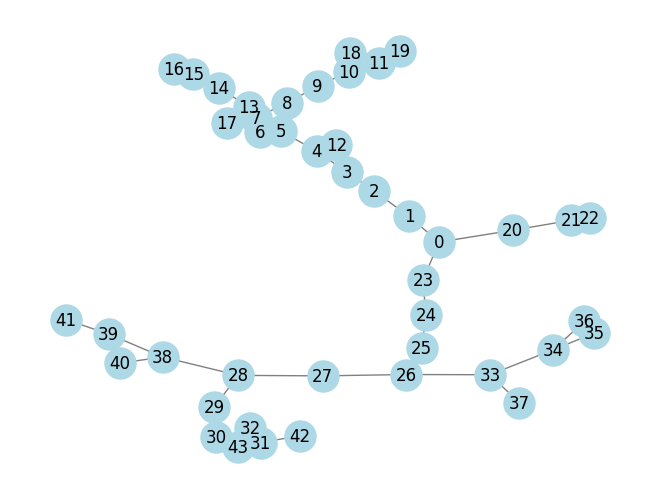

In [ ]:
import networkx as nx

from matplotlib import pyplot as plt

# Create graph
G = nx.Graph(adj_matrix_array)

# Plot graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.show()

In [ ]:
import pandapower as pp
import pandapower.networks as pn
import networkx as nx
import plotly.graph_objs as go
import plotly.io as pio
from networkx.drawing.nx_agraph import graphviz_layout
#import kaleido

# Create graph
G = nx.Graph(adj_matrix_array)

# Extract the edges from the pandapower graph
edges_from_graph = list(G.edges())

# Extract the edges
edges_from_lines = list(net.line[['from_bus', 'to_bus']].itertuples(index=False))
edges_from_trafos = list(net.trafo[['hv_bus', 'lv_bus']].itertuples(index=False))
edges_from_switches = [(switch.bus, switch.element) for switch in net.switch[net.switch.closed].itertuples(index=False)]


# Create a new directed graph (DiGraph)
G = nx.DiGraph()

# Add the edges from lines and trafos to make it hierarchical
G.add_edges_from(edges_from_lines)
G.add_edges_from(edges_from_trafos)
G.add_edges_from(edges_from_switches)

# Modify node colors

# Remove selected buses from extreme_buses (this was calculate before to assign node, where loads to all with degree less than 1, then 50% get sgen)
extreme_buses_1 = [bus_id for bus_id in extreme_buses if bus_id not in selected_buses]

# Create a dictionary to specify colors for the nodes
node_colors = {node: 'red' if node == 0 else 'green' if node in extreme_buses_1 else 'orange' if node in selected_buses else 'grey' for node in net.bus.index}

# edge colors
edge_colors = {
    (0, 1): 'red',
    (0, 2): 'black',
}

# Get the layout of the graph
pos = graphviz_layout(G, prog="dot")

# Manually adjust the positions of bus 0 and bus 1, 23 to create a vertical alignment
pos[0] = (333, 810)
pos[1] = (333, 810)
pos[23] = (333, 810)

fig = go.Figure()

# Loop through nodes and add them to the plot, set showlegend to False
for node in G.nodes:
    x, y = pos[node]
    color = node_colors.get(node, 'grey')
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers',
                             marker=dict(size=10, color=color),
                             text=str(node), showlegend=False))

# Loop through edges and add them to the plot, set showlegend to False
for lv_bus, hv_bus in G.edges:
    x1, y1 = pos[lv_bus]
    x2, y2 = pos[hv_bus]
    color = edge_colors.get((lv_bus, hv_bus), 'black')
    fig.add_trace(go.Scatter(x=[x1, x2], y=[y1, y2], mode='lines',
                             line=dict(width=2, color=color), showlegend=False))
# Add legend with colors
legend_colors = {
    'Bus 0 (Slack)': 'red',
    'Consumers': 'green',
    'Prosumers': 'orange',
    'iddle': 'grey'
}

# legend with colors, attribute set to True
for label, color in legend_colors.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color),
                             name=label, showlegend=True))


#layout
fig.update_layout(width=800, height=600, plot_bgcolor='white',
                  showlegend=True, legend=dict(orientation='h', x=0, y=1.1),
                  xaxis_visible=False, yaxis_visible=False,
                  font=dict(
                      family="'CMU Serif', serif",  # This is a font resembles LaTeX font
                      size=18,
                      color="black"
    ))

fig.update_yaxes(scaleanchor='x', scaleratio=0.5)


# Show the plot
fig.show()

# Save the figure with high resolution
#fig.write_image('network_44_WB.png', width=800, height=600, scale=2) #kakeido or orca

In [ ]:
import numpy as np

# Initialize Ybus as a zeros matrix
Ybus = np.zeros((n_buses,n_buses), dtype=complex)

# Iterate over lines in the network
for _, line in net.line.iterrows():
    # Get the from and to buses
    from_bus = int(line.from_bus)
    to_bus = int(line.to_bus)

    # Calculate the line admittance
    z = complex(line.r_ohm_per_km, line.x_ohm_per_km)  # r and x are given per km
    y = 1 / z

    # Populate the Ybus matrix
    Ybus[from_bus][from_bus] += y
    Ybus[to_bus][to_bus] += y
    Ybus[from_bus][to_bus] -= y
    Ybus[to_bus][from_bus] -= y

# Include switches (assumed open)
for _, switch in net.switch.iterrows():
    bus = int(switch.bus)
    Ybus[bus][bus] += 1e-6  # Small admittance to represent open switch

# Include external grid (slack bus)
slack_bus = 0
Ybus[slack_bus][slack_bus] += 1e6  # Large admittance to represent external grid

# Include transformers (equivalent pi-model)
for _, trafo in net.trafo.iterrows():
    hv_bus = int(trafo.hv_bus)
    lv_bus = int(trafo.lv_bus)


    # Manually specify transformer parameters in per unit values
    vk_percent = trafo.vk_percent
    vkr_percent = trafo.vkr_percent

    # Calculate series and shunt admittances
    z_series = complex(0, vkr_percent / 100 * vk_percent / 100)  # Assuming vk_percent and vkr_percent are given in per unit
    y_series = 1 / z_series

    # Populate the Ybus matrix
    Ybus[hv_bus][hv_bus] += y_series
    Ybus[lv_bus][lv_bus] += y_series
    Ybus[hv_bus][lv_bus] -= y_series
    Ybus[lv_bus][hv_bus] -= y_series

print(Ybus)

[[1.00000000e+06+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00-2.42535603e+03j
  0.00000000e+00+2.42535603e+03j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+2.42535603e+03j
  4.88448495e+00-2.42786461e+03j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 ...
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 4.82598575e-01-7.99983655e-02j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  4.82598575e-01-7.99983655e-02j 0.00000000e+00+0.00000000e+00j]
 [0.000000

## Fixing Ybus

In [ ]:
net_N["_ppc"]['internal']['Ybus']

orphaned_buses = set(net_N.bus.index) - set(net_N.line.from_bus) - set(net_N.line.to_bus) - set(net_N.trafo.hv_bus) - set(net_N.trafo.lv_bus)
if orphaned_buses:
    print(f"Orphaned buses detected: {orphaned_buses}")

print(net_N.ext_grid)

connected_lines = net_N.line[(net_N.line.from_bus == 0) | (net_N.line.to_bus == 0)]
print(connected_lines)

connected_trafos = net_N.trafo[(net_N.trafo.hv_bus == 0) | (net_N.trafo.lv_bus == 0)]
print(connected_trafos)

pp.create_ext_grid(net_N, bus=0, vm_pu=1.0, name="Grid Connection")
bus_hv = 0  # This is the bus where the external grid is connected.
#bus_lv = pp.create_bus(net, vn_kv=20.0, name="LV Bus")
#pp.create_transformer(net, hv_bus=bus_hv, lv_bus=bus_lv, std_type="25 MVA 110/20 kV", name="T1")

from pandapower.pypower.makeYbus import makeYbus
Ybus1, Yf, Yt = makeYbus(net_N._ppc['baseMVA'], net_N._ppc['bus'], net_N._ppc['branch'])
Ybus_dense_check = Ybus1.todense()
print(Ybus_dense_check.shape)

Orphaned buses detected: {0}
   name  bus  vm_pu  va_degree  slack_weight  in_service  s_sc_max_mva  \
0  None    0    1.0        0.0           1.0        True         100.0   

   s_sc_min_mva  rx_min  rx_max  
0         100.0     1.0     1.0  
Empty DataFrame
Columns: [name, std_type, from_bus, to_bus, length_km, r_ohm_per_km, x_ohm_per_km, c_nf_per_km, g_us_per_km, max_i_ka, df, parallel, type, in_service]
Index: []
Empty DataFrame
Columns: [name, std_type, hv_bus, lv_bus, sn_mva, vn_hv_kv, vn_lv_kv, vk_percent, vkr_percent, pfe_kw, i0_percent, shift_degree, tap_side, tap_neutral, tap_min, tap_max, tap_step_percent, tap_step_degree, tap_pos, tap_phase_shifter, parallel, df, in_service]
Index: []
(44, 44)


# Network state without P2P

In [ ]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
import networkx as nx
import numpy as np
from scipy.sparse import csr_matrix

# Create a graph from the network
graph = pp.topology.create_nxgraph(net)

# Remove all loads and generations
net.load.drop(net.load.index, inplace=True)
net.sgen.drop(net.sgen.index, inplace=True)
net.gen.drop(net.gen.index, inplace=True)

# Transpose the DataFrame
transposed_df = cluster_medians.T
# Take just the first row (hour 11 for now)
first_row = transposed_df.iloc[:, 11]
#Removing previous values
net.load.drop(net.load.index, inplace=True)

# Find extreme buses (logic is that loads and sgen will be here....)
extreme_buses = [node for node, degree in graph.degree() if degree == 1]
extreme_buses

# set loads on these
for bus in extreme_buses:
    #load = first_row.get(bus, 0)
    load = first_row.iloc[1]
    q_value = np.abs(load * np.tan(np.arccos(0.99)))
    pp.create_load(net, bus=bus, p_mw=load/1e3,q_mvar=q_value/1e3) #recall that values are in MW

# Calculate 50% of the extreme buses
num_to_add = int(len(extreme_buses) * 0.5)

# Randomly select 50% of the extreme buses
np.random.shuffle(extreme_buses)
selected_buses = extreme_buses[:num_to_add]

#Removing previous values
net.sgen.drop(net.sgen.index, inplace=True)

# Transpose the DataFrame for solar data
transposed_df_solar = cluster_medians_solar.T

# Take just the first row (hour 11 for now)
first_row_solar = transposed_df_solar.iloc[:, 11]

# Add sgens to the selected buses using solar data
for bus in selected_buses:
    solar_value = first_row_solar.iloc[1] #1st cluster
    q_value = np.abs(solar_value * np.tan(np.arccos(0.99)))
    pp.create_sgen(net, bus=bus, p_mw=solar_value/1e3, q_mvar=q_value/1e3) #recall that values are in MW

In [ ]:
net.load

name  bus      p_mw    q_mvar  const_z_percent  const_i_percent  sn_mva  \
0   None   12  0.002419  0.000345              0.0              0.0     NaN   
1   None   16  0.002419  0.000345              0.0              0.0     NaN   
2   None   17  0.002419  0.000345              0.0              0.0     NaN   
3   None   18  0.002419  0.000345              0.0              0.0     NaN   
4   None   19  0.002419  0.000345              0.0              0.0     NaN   
5   None   22  0.002419  0.000345              0.0              0.0     NaN   
6   None   35  0.002419  0.000345              0.0              0.0     NaN   
7   None   36  0.002419  0.000345              0.0              0.0     NaN   
8   None   37  0.002419  0.000345              0.0              0.0     NaN   
9   None   40  0.002419  0.000345              0.0              0.0     NaN   
10  None   41  0.002419  0.000345              0.0              0.0     NaN   
11  None   42  0.002419  0.000345              0.0              0.0     NaN   
12  None   43  0.002419  0.000345              0.0              0.0     NaN   

    scaling  in_service type  ask_price  
0       1.0        True  wye        NaN  
1       1.0        True  wye        NaN  
2       1.0        True  wye        NaN  
3       1.0        True  wye        NaN  
4       1.0        True  wye        NaN  
5       1.0        True  wye        NaN  
6       1.0        True  wye        NaN  
7       1.0        True  wye        NaN  
8       1.0        True  wye        NaN  
9       1.0        True  wye        NaN  
10      1.0        True  wye        NaN  
11      1.0        True  wye        NaN  
12      1.0        True  wye        NaN

# Gurobi

In [ ]:
len(formatted_matches)

9

In [ ]:
sum(item[2] for item in formatted_matches)

0.7290000000000001

In [ ]:
from gurobipy import Model, GRB, quicksum
import numpy as np
import time

# Set Method
# -1 = automatic (default)
# 0 = primal simplex
# 1 = dual simplex
# 2 = barrier
# 3 = concurrent
# 4 = deterministic concurrent

# Create a new model
m = Model("p2p_optimization")

#m.setParam("Method", 0)
# Set Method to Interior Point (Barrier)
m.setParam("Method", 2)
m.setParam('OutputFlag', 1)


B = np.imag(Ybus)  # Susceptance matrix from the imaginary part of Ybus
n_buses = B.shape[0]
n_trades = len(formatted_matches)  # Number of P2P trades


# Define variables
#theta = m.addVars(n_buses, lb=-np.pi/6, ub=np.pi/6, name="theta")  # Voltage angles
theta = m.addVars(n_buses, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="theta")
slack_power = m.addVar(lb=-100, ub=100, name="slack_power")
x = m.addVars(len(formatted_matches), lb=0, ub=1, name="trade_vars")


slack_bus_index = 0  # Define bus 0 as the slack bus
total_power_mismatch = 0
total_demand = 0
total_gen = 0

for i in range(n_buses):
    sgen_indices = [t for t in net.sgen.index if net.sgen.at[t, 'bus'] == i]
    load_indices = [t for t in net.load.index if net.load.at[t, 'bus'] == i]

    generation_i = quicksum(net.sgen.at[t, 'p_mw'] for t in sgen_indices)
    demand_i = quicksum(net.load.at[t, 'p_mw'] for t in load_indices)

    # Debugging the values in net.sgen and net.load (namely that did not erased before..)
    #print("Generation units in net.sgen:")
    #print(net.sgen)

    #print("\nLoad units in net.load:")
    #print(net.load)

    # Adjust generation and demand based on P2P trades this is tilde_g
    for t, (source_bus, dest_bus, quantity, _) in enumerate(formatted_matches):
        if source_bus == i:
            generation_i += x[t] * quantity
        if dest_bus == i:
            demand_i += x[t] * quantity

    net_power_injection = generation_i - demand_i #this is g_0 + tilde_g as was uptdated by tilde_g
    total_power_mismatch += net_power_injection
    total_demand += demand_i  # Increment total demand

    total_gen += generation_i  # Increment total mismatch


    power_flow_in_i = quicksum(B[i, j] * (theta[i] - theta[j]) for j in range(n_buses) if j != i)

    # Apply power balance constraint for each bus
    if i != slack_bus_index:
      relax_var = m.addVar(name="relax")
      m.addConstr(net_power_injection == power_flow_in_i - relax_var, name=f"net_power_balance_{i}")
      #m.addConstr(net_power_injection - power_flow_in_i - relax_var == 0, name=f"net_power_balance_{i}")

    if i == slack_bus_index:
        # Update the mismatch specifically for the slack bus
        slack_bus_mismatch = net_power_injection
        print(f"Slack Bus {i} Mismatch: {slack_bus_mismatch}")
    else:
        # Update total mismatch for all other buses
        total_power_mismatch += net_power_injection

# If the total mismatch is positive, the slack bus will absorb power (acts as load).
# If the total mismatch is negative, the slack bus will supply power (acts as generator).
m.addConstr(slack_power == total_power_mismatch, name="slack_power_balance")
#m.update()

# Power flow constraints
for i in range(n_buses):
    for j in range(n_buses):
        if B[i, j] > 0:  #connection between buses i and j
            power_flow = B[i, j] * (theta[i] - theta[j])
            m.addConstr(power_flow <= adj_matrix[i, j], name=f"P_flow_max_{i}_{j}")
            m.addConstr(power_flow >= -adj_matrix[i, j], name=f"P_flow_min_{i}_{j}")

# Angle difference constraints
max_angle_diff = np.pi / 6  # 30 degrees
for i in range(n_buses):
    for j in range(n_buses):
        if i != j and B[i, j] > 0:
            m.addConstr(theta[i] - theta[j] <= max_angle_diff, name=f"angle_diff_max_{i}_{j}")
            m.addConstr(theta[i] - theta[j] >= -max_angle_diff, name=f"angle_diff_min_{i}_{j}")

# list to store the trade quantities
trade_quantities = [quantity for _, _, quantity, _ in formatted_matches]


objective = quicksum(trade_quantities[t] * x[t] for t in range(len(formatted_matches)))

# Set the objective function in the model
m.setObjective(objective, GRB.MAXIMIZE)


# Callback function definition
def data_cb(model, where):
    if where == GRB.Callback.BARRIER:
        cur_obj = model.cbGet(GRB.Callback.BARRIER_PRIMOBJ)
        runtime = time.time() - model._start
        model._data.append([runtime, cur_obj])


m._obj = None
m._bd = None
m._data = []
m._start = time.time()


m.optimize(data_cb)

# Output
if m.status == GRB.OPTIMAL or m.status == GRB.SUBOPTIMAL:

    print("Optimal solution found:")

    # Print theta values for each bus
    for i in range(n_buses):
        print(f"Bus {i} Theta: {theta[i].X:.6f}")

        # Print relax variable value for each bus
    for i in range(n_buses):
       print(f"Bus {i} relax: {relax_var.X:.6f}")

    # Print trade execution levels (x[t]) along with associated quantities
    for t, (source_bus, dest_bus, quantity, _) in enumerate(formatted_matches):
        executed_quantity = x[t].X * quantity
        print(f"Trade {t}: Execution level (x[{t}]): {x[t].X:.6f}, Quantity: {quantity}, Executed Quantity: {executed_quantity:.6f}")

    # Print slack power
    print(f"Slack Power: {slack_power.X:.6f}")

    total_demand_value = total_demand.getValue()
    print(f"Total Demand across all buses: {total_demand_value:.6f}")

if m.status == GRB.INF_OR_UNBD:
    print('Model is infeasible or unbounded')
elif m.status == GRB.INFEASIBLE:
    m.computeIIS()
    m.write("model.ilp")
    # Check the values of the slack/surplus variables
    for c in m.getConstrs():
        if c.IISConstr:
            print(f"Constraint {c.constrName} is part of the IIS.")
    for v in m.getVars():
        if v.VarName.startswith('ArtN_') or v.VarName.startswith('ArtS_'):
            if v.X > 1e-5:  # A threshold to determine if the slack variable is significant
                print(f"Constraint {v.VarName} was relaxed by {v.X}")
    # Perform a feasibility relaxation to identify which constraints are problematic
    m.feasRelaxS(0, False, False, True)
    m.optimize()

    print('Model is infeasible')
elif m.status == GRB.UNBOUNDED:
    print('Model is unbounded')
else:
    print(f'Optimization was stopped with status {m.status}')

Set parameter Method to value 2
Slack Bus 0 Mismatch: 0.0
0.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 364 rows, 97 columns and 825 nonzeros
Model fingerprint: 0xfd30f0ce
Coefficient statistics:
  Matrix range     [1e-03, 2e+03]
  Objective range  [1e-03, 1e-01]
  Bounds range     [1e+00, 1e+02]
  RHS range        [1e-03, 1e+00]
Presolve removed 337 rows and 64 columns
Presolve time: 0.01s
Presolved: 27 rows, 35 columns, 93 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.700e+01
 Factor NZ  : 2.640e+02
 Factor Ops : 3.510e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.52123432e+00  1.88976198e+00  6.91e+00 3.55e-

In [ ]:
    # For net_power_balance constraints
    for bus_id in [21, 22,23]:
        sgen_indices = [t for t in net.sgen.index if net.sgen.at[t, 'bus'] == bus_id]
        load_indices = [t for t in net.load.index if net.load.at[t, 'bus'] == bus_id]

        generation = sum(net.sgen.at[t, 'p_mw'] * x[t].X for t in sgen_indices)
        demand = sum(net.load.at[t, 'p_mw'] for t in load_indices)
        net_power_injection = generation - demand

        power_flow_out = sum(B[bus_id, j] * (theta[bus_id].X - theta[j].X) for j in range(n_buses) if j != bus_id)
        power_flow_in = sum(B[j, bus_id] * (theta[j].X - theta[bus_id].X) for j in range(n_buses) if j != bus_id)

        print(f"Bus {bus_id} Net Power Balance: Generation - Demand + Power In - Power Out = {net_power_injection + power_flow_in - power_flow_out}")

    # For transit_power_balance constraint
    bus_id = 20
    transit_bus_power_in = sum(B[bus_id, j] * (theta[bus_id].X - theta[j].X) for j in range(n_buses) if j != bus_id)
    transit_bus_power_out = sum(B[j, bus_id] * (theta[j].X - theta[bus_id].X) for j in range(n_buses) if j != bus_id)

    print(f"Bus {bus_id} Transit Power Balance: Power In - Power Out = {transit_bus_power_in - transit_bus_power_out}")


Bus 21 Net Power Balance: Generation - Demand + Power In - Power Out = -0.002407570872343071
Bus 22 Net Power Balance: Generation - Demand + Power In - Power Out = 0.0007905473607535203
Bus 23 Net Power Balance: Generation - Demand + Power In - Power Out = -3.393262322326081e-14
Bus 20 Transit Power Balance: Power In - Power Out = 0.0


In [ ]:
for i in range(n_buses):
    if i == 21 or i == 22 or i == 23:
        print(f"Bus {i} Power Balance Details:")
        # Assuming `generation_i` and `demand_i` are Gurobi expressions.
        print(f"Generation_i: {generation_i.getValue()}")
        print(f"Demand_i: {demand_i.getValue()}")

Bus 21 Power Balance Details:
Generation_i: 0.0012150000000000002
Demand_i: 0.0024187854361715356
Bus 22 Power Balance Details:
Generation_i: 0.0012150000000000002
Demand_i: 0.0024187854361715356
Bus 23 Power Balance Details:
Generation_i: 0.0012150000000000002
Demand_i: 0.0024187854361715356


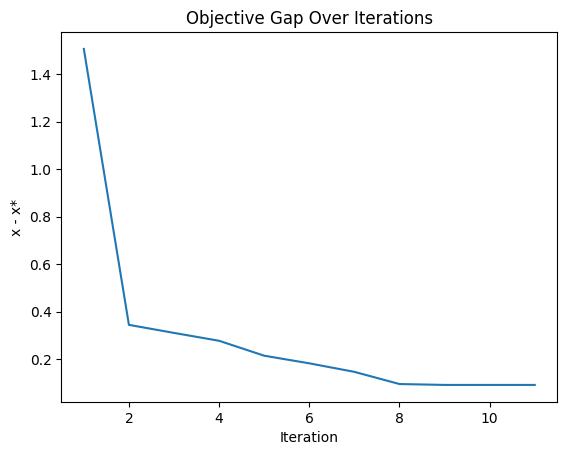

In [ ]:
import matplotlib.pyplot as plt

m_data = m._data
# Extract time and objective values
times = [x[0] for x in m_data]
objs = [x[1] for x in m_data]

# Assuming x* is the final objective value
x_star = objs[-1]

# Calculate x - x* for each iteration
gap = [x - x_star for x in objs]

# Iteration count
iterations = list(range(1, len(objs) + 1))

# Create the plot
plt.plot(iterations, objs)
plt.xlabel('Iteration')
plt.ylabel('x - x*')
plt.title('Objective Gap Over Iterations')
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=gap , mode='lines+markers', name='Solution Values'))
fig.update_layout(title='Objective Gap Over Iterations',
                   xaxis_title='Iteration',
                   yaxis_title='x - x*')
fig.show()

In [ ]:
for constr in m.getConstrs():
    print(constr.ConstrName, m.getRow(constr))

net_power_balance_1 -2425.356030138444 theta[1] + 2425.356030138444 theta[2] + relax
net_power_balance_2 2425.356030138444 theta[1] + -2427.864605123127 theta[2] + 2.5085749846832197 theta[3] + relax
net_power_balance_3 2.5085749846832197 theta[2] + -5.017149969366439 theta[3] + 2.5085749846832197 theta[4] + relax
net_power_balance_4 2.5085749846832197 theta[3] + -5.14118745422658 theta[4] + 2.5085749846832197 theta[5] + 0.1240374848601413 theta[12] + relax
net_power_balance_5 2.5085749846832197 theta[4] + -5.14118745422658 theta[5] + 2.5085749846832197 theta[6] + 0.1240374848601413 theta[13] + relax
net_power_balance_6 2.5085749846832197 theta[5] + -5.017149969366439 theta[6] + 2.5085749846832197 theta[7] + relax
net_power_balance_7 2.5085749846832197 theta[6] + -5.14118745422658 theta[7] + 2.5085749846832197 theta[8] + 0.1240374848601413 theta[17] + relax
net_power_balance_8 2.5085749846832197 theta[7] + -5.017149969366439 theta[8] + 2.5085749846832197 theta[9] + relax
net_power_bala

In [ ]:
import numpy as np
from scipy.sparse import dok_matrix

# Initialize model variables and constraints
n_vars = m.NumVars
n_constrs = m.NumConstrs

# Initialize A matrix as a sparse DOK matrix, B and C vectors as NumPy arrays
A = dok_matrix((n_constrs, n_vars), dtype=np.float32)
b = np.zeros(n_constrs, dtype=np.float32)
c = np.zeros(n_vars, dtype=np.float32)

# Create mapping from variable name to index
var_dict = {var.VarName: index for index, var in enumerate(m.getVars())}

# Populate B vector and A matrix
for i, constr in enumerate(m.getConstrs()):
    b[i] = constr.RHS
    expr = m.getRow(constr)
    for j in range(expr.size()):
        var = expr.getVar(j)
        coeff = expr.getCoeff(j)
        var_index = var_dict[var.VarName]
        A[i, var_index] = coeff

# Populate C
for i, var in enumerate(m.getVars()):
    c[i] = var.Obj

# Convert A to a CSR matrix
A = A.tocsr()

In [ ]:
A = A.toarray()
print("Shape of A:", A.shape)
print("Shape of b:", b.shape)
print("Shape of c:", c.shape)

Shape of A: (364, 97)
Shape of b: (364,)
Shape of c: (97,)


# Updating network state with validated $q_t$

In [ ]:
for t, (source_bus, dest_bus, quantity, _) in enumerate(formatted_matches):
  executed_quantity = x[t].X  * quantity
  #Update generation at source bus
  net.sgen.loc[net.sgen['bus'] == source_bus, 'p_mw'] += executed_quantity

  # Update load at destination bus
  net.load.loc[net.load['bus'] == dest_bus, 'p_mw'] += executed_quantity

In [ ]:
import pandapower as pp
pp.rundcpp(net) #DC

Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [ ]:
net.res_bus

vm_pu  va_degree      p_mw    q_mvar
0     1.0   0.000000 -0.113419 -0.004884
1     1.0   0.000000  0.000000  0.000000
2     1.0 -30.469306  0.000000  0.000000
3     1.0 -30.576073  0.000000  0.000000
4     1.0 -30.682840  0.000000  0.000000
5     1.0 -30.705517  0.000000  0.000000
6     1.0 -30.725671  0.000000  0.000000
7     1.0 -30.745826  0.000000  0.000000
8     1.0 -30.750871  0.000000  0.000000
9     1.0 -30.755915  0.000000  0.000000
10    1.0 -30.760960  0.000000  0.000000
11    1.0 -30.763482  0.000000  0.000000
12    1.0 -30.756216  0.080640  0.000172
13    1.0 -30.708084  0.000000  0.000000
14    1.0 -30.710652  0.000000  0.000000
15    1.0 -30.713220  0.000000  0.000000
16    1.0 -30.715421  0.002419  0.000345
17    1.0 -30.759011  0.014490  0.000345
18    1.0 -30.763161  0.002419  0.000345
19    1.0 -30.765683  0.002419  0.000345
20    1.0   0.000000  0.000000  0.000000
21    1.0 -30.018407  0.000000  0.000000
22    1.0 -30.025502  0.001204  0.000172
23    1.0   0.000000  0.000000  0.000000
24    1.0 -30.074968  0.000000  0.000000
25    1.0 -30.105028  0.000000  0.000000
26    1.0 -30.135089  0.000000  0.000000
27    1.0 -30.153533  0.000000  0.000000
28    1.0 -30.171976  0.000000  0.000000
29    1.0 -30.179340  0.000000  0.000000
30    1.0 -30.186703  0.000000  0.000000
31    1.0 -30.194067  0.000000  0.000000
32    1.0 -30.197749  0.000000  0.000000
33    1.0 -30.148188  0.000000  0.000000
34    1.0 -30.152946  0.000000  0.000000
35    1.0 -30.161633  0.002419  0.000345
36    1.0 -30.149214 -0.001039  0.000172
37    1.0 -30.156875  0.002419  0.000345
38    1.0 -30.184468  0.000000  0.000000
39    1.0 -30.192810  0.000000  0.000000
40    1.0 -30.188792  0.001204  0.000172
41    1.0 -30.201496  0.002419  0.000345
42    1.0 -30.198390  0.001204  0.000172
43    1.0 -30.202072  0.001204  0.000172